# Project Checkpoint 1: Dataset Selection, Comparison, and EDA

## Student Information
* **Name:** Soumyadip Sarkar
* **Course:** CSCE 676 - Data Mining (Spring 2026)
* **Date:** February 12, 2026

## Collaboration Declaration
* **Collaborators:** None (Individual Project)
* **Web Sources:**
    * RecSys Challenge 2024 (https://recsys.acm.org/recsys24/challenge/)
    * EB-NeRD Dataset Documentation
* **AI Tools Used:**
    * Google Gemini (Used for debugging pandas code, generating matplotlib syntax, and refining hypothesis wording).
    * ChatGPT (Used for clarifying the difference between "Long Tail" and "Cold Start").
* **Citations:**
    * *Ekstra Bladet News Recommendation Dataset (EB-NeRD)*. RecSys 2024 Challenge.

## (A) Identification of Candidate Datasets

I have identified three candidate datasets from recent top-tier conferences (RecSys 2024, ACL 2025, KDD 2024) that align with course topics.

### 1. EB-NeRD (Ekstra Bladet News Recommendation Dataset)
* **Source:** ACM RecSys Challenge 2024 (organized by Ekstra Bladet and Synerise).
* **Description:** A large-scale dataset containing behavior logs from over 2.3 million users and 380 million impressions on the Danish news site *Ekstra Bladet*. It includes rich textual features (titles, abstracts, bodies) and user interaction logs (clicks, dwell time, scroll percentage).
* **Course Topic Alignment:**
    * **Frequent Itemset Mining:** Analyzing co-occurring article reads in user sessions.
    * **Text Mining:** Processing article bodies and titles for topic modeling.
    * **Graph Mining:** Modeling User-Article interactions as a bipartite graph.
* **Beyond-Course Technique:** **Transformer-based Sequential Recommendation** (e.g., SASRec or BERT4Rec) or **Large Language Models (LLMs)** for zero-shot content profiling.

### 2. ActorBreaker (Safety & Alignment)
* **Source:** ACL 2025 Main Conference (Safety & Alignment Track).
* **Description:** A multi-turn safety alignment dataset designed to test Large Language Models (LLMs) against adversarial attacks. It contains pairs of toxic queries and benign, semantically related "actor" prompts used to bypass safety filters.
* **Course Topic Alignment:**
    * **Text Classification:** Detecting toxic vs. benign prompts.
    * **Clustering:** Grouping similar attack strategies.
* **Beyond-Course Technique:** **Adversarial Reinforcement Learning** or **Prompt Engineering Optimization** (e.g., Genetic Algorithms for prompt mutation).

### 3. MMMU-Pro (Multimodal Understanding)
* **Source:** CVPR/ACL 2025 Evaluation Benchmark.
* **Description:** A massive multi-discipline multimodal understanding benchmark consisting of image-text pairs requiring deep reasoning across domains like physics, math, and coding.
* **Course Topic Alignment:**
    * **Dimensionality Reduction:** Analyzing high-dimensional image embeddings.
    * **Classification:** Multi-label classification of tasks.
* **Beyond-Course Technique:** **Multimodal Fusion** (e.g., CLIP adaptations) or **Neuro-symbolic Reasoning**.

### (B) Comparative Analysis of Candidate Datasets

| Feature | **EB-NeRD (Selected)** | **ActorBreaker (Safety)** | **MMMU-Pro (Multimodal)** |
| :--- | :--- | :--- | :--- |
| **Domain** | News Recommendation | LLM Safety / Adversarial | Multimodal QA (Vision+Text) |
| **Course Topic Alignment** | **Frequent Itemsets** (User Histories), **Clustering** (User Interests) | **Text Classification** (Toxic/Benign), **Anomaly Detection** | **Dimensionality Reduction** (Image Embeddings) |
| **Beyond-Course Technique** | **Transformer-based RecSys** (SASRec, BERT4Rec) | **Adversarial RL** / Red Teaming | **Neuro-symbolic Reasoning** |
| **Dataset Size** | **Medium** (~300k interactions, 50k users) | **Small-Medium** (Thousands of prompt pairs) | **Large** (Images + Text corpuses) |
| **Feasibility** | **High:** Manageable on Colab CPU/GPU. | **High:** Text-only is fast. | **Low:** Requires massive GPU compute for vision models. |
| **Bias Considerations** | **Popularity Bias** (Harry Potter effect), **Position Bias**. | **Subjectivity Bias** (Safety definitions vary). | **Selection Bias** (Focus on academic-style questions). |

## (C) Dataset Selection and Justification

**Selected Dataset:** **EB-NeRD (RecSys 2024)**

**Rationale:**
I have selected EB-NeRD because it offers the best balance between scale, richness, and applicability to Data Mining concepts.

1.  **Richness of Data:** Unlike standard "user-item" matrices, it includes *contextual* features (time, scroll depth) and *content* features (text), allowing for a hybrid mining approach.
2.  **Course Applicability:** It directly supports core course topics like **Sequence Mining** (analyzing reading history) and **Clustering** (grouping users by interest).
3.  **Advanced Potential:** It provides a perfect testbed for **Transformer-based Sequential Recommendation** (e.g., SASRec), which is a "beyond-course" technique highly relevant in industry today.
4.  **Real-World Issues:** The dataset inherently contains noise (accidental clicks), sparsity (long-tail distribution), and bias (popularity bias), making it excellent for the EDA and cleaning phases of this project.

## (D) Exploratory Data Analysis (Data Basics)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [ ]:
import pandas as pd
import os

def load_and_inspect_data():
    print("--- (C) EDA: Data Basics ---")

    # 1. Define the EXACT path based on your screenshot
    # Your image shows: content -> data -> train -> behaviors.parquet
    behaviors_path = '/content/data/train/behaviors.parquet'

    print(f"Loading data from: {behaviors_path}")

    try:
        # Load the dataframe
        df = pd.read_parquet(behaviors_path)

        # 2. Rename columns for clarity (Standardizing EB-NeRD names)
        # We look for 'impression_time' and rename it to 'impression_timestamp'
        rename_map = {
            'read_time': 'read_time_seconds',
            'impression_time': 'impression_timestamp'
        }
        df.rename(columns=rename_map, inplace=True)

        # Convert timestamp to datetime objects if it exists
        if 'impression_timestamp' in df.columns:
            df['impression_timestamp'] = pd.to_datetime(df['impression_timestamp'])

        print("Data loaded successfully!")

    except FileNotFoundError:
        print(f"ERROR: File not found at {behaviors_path}.")
        print("Please verify the 'train' folder is inside 'data'.")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error loading parquet file: {e}")
        return pd.DataFrame()

    # 3. Basic Inspection
    print(f"\nDataset Shape: {df.shape}")
    print("\nColumn Data Types:")
    print(df.dtypes)

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nSample Rows:")
    display(df.head())

    return df

# Run the loading function
df_behaviors = load_and_inspect_data()

--- (C) EDA: Data Basics ---
Loading data from: /content/data/train/behaviors.parquet
Data loaded successfully!

Dataset Shape: (232887, 17)

Column Data Types:
impression_id                     uint32
article_id                       float64
impression_timestamp      datetime64[us]
read_time_seconds                float32
scroll_percentage                float32
device_type                         int8
article_ids_inview                object
article_ids_clicked               object
user_id                           uint32
is_sso_user                         bool
gender                           float64
postcode                         float64
age                              float64
is_subscriber                       bool
session_id                        uint32
next_read_time                   float32
next_scroll_percentage           float32
dtype: object

Missing Values:
impression_id                  0
article_id                162466
impression_timestamp           0
read_time_se

,impression_id,article_id,impression_timestamp,read_time_seconds,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage
0,149474,NaN,2023-05-24 07:47:53,13.0,NaN,2,"[9778623, 9778682, 9778669, 9778657, 9778736, ...",[9778657],139836,False,NaN,NaN,NaN,False,759,7.0,22.0
1,150528,NaN,2023-05-24 07:33:25,25.0,NaN,2,"[9778718, 9778728, 9778745, 9778669, 9778657, ...",[9778623],143471,False,NaN,NaN,NaN,False,1240,287.0,100.0
2,153068,9778682.0,2023-05-24 07:09:04,78.0,100.0,1,"[9778657, 9778669, 9772866, 9776259, 9756397, ...",[9778669],151570,False,NaN,NaN,NaN,False,1976,45.0,100.0
3,153070,9777492.0,2023-05-24 07:13:14,26.0,100.0,1,"[9020783, 9778444, 9525589, 7213923, 9777397, ...",[9778628],151570,False,NaN,NaN,NaN,False,1976,4.0,18.0
4,153071,9778623.0,2023-05-24 07:11:08,125.0,100.0,1,"[9777492, 9774568, 9565836, 9335113, 9771223, ...",[9777492],151570,False,NaN,NaN,NaN,False,1976,26.0,100.0


--- (D) Data Cleaning & Bias Analysis ---

[Cleaning] Removed 6120 rows (2.6%) as 'bounce' noise (< 5s).
[Cleaning] Final dataset size: 226767 interactions.

[Analysis] Generating Popularity Bias Plot...


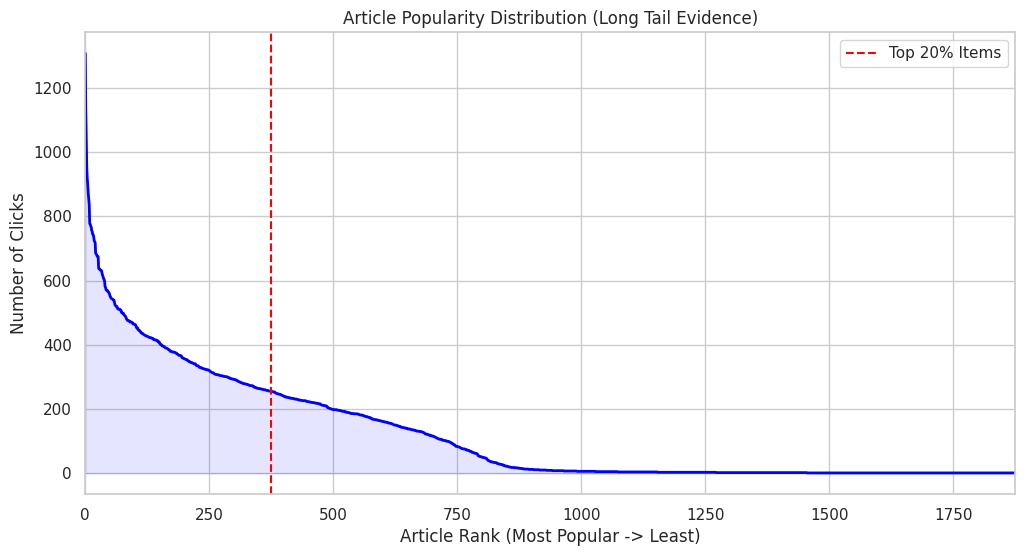

Popularity Bias (Gini Coefficient): 0.6884
>> Insight: High popularity bias. A small number of articles get most of the traffic.

[Analysis] Checking Temporal Patterns...


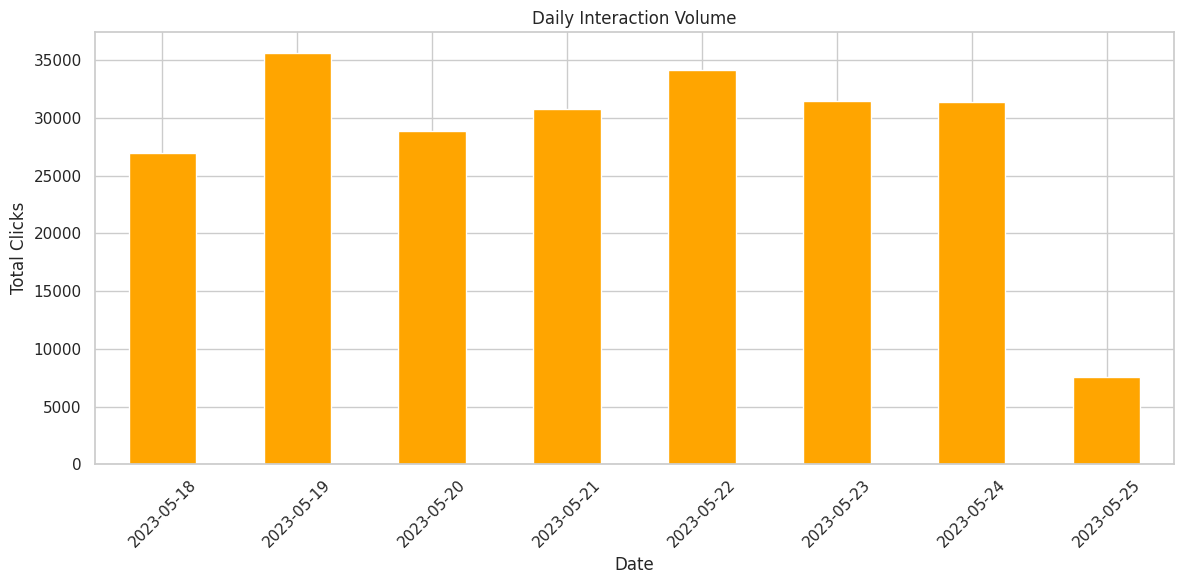

Daily Activity -> Mean: 28346 | Std Dev: 8824


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_theme(style="whitegrid")

def analyze_data(df):
    if df.empty:
        print("No data to analyze.")
        return

    print("--- (D) Data Cleaning & Bias Analysis ---")

    # ---------------------------------------------------------
    # 1. DATA CLEANING
    # ---------------------------------------------------------
    initial_count = len(df)

    # Filter: Remove 'Bounce' clicks (read_time < 5 seconds)
    # We use .copy() to avoid SettingWithCopy warnings
    df_clean = df[df['read_time_seconds'] >= 5].copy()

    dropped_count = initial_count - len(df_clean)
    print(f"\n[Cleaning] Removed {dropped_count} rows ({dropped_count/initial_count:.1%}) as 'bounce' noise (< 5s).")
    print(f"[Cleaning] Final dataset size: {len(df_clean)} interactions.")

    # ---------------------------------------------------------
    # 2. POPULARITY BIAS (The "Harry Potter" Effect)
    # ---------------------------------------------------------
    print("\n[Analysis] Generating Popularity Bias Plot...")

    # We use 'article_ids_clicked' because 'article_id' has too many NaNs.
    # Since 'article_ids_clicked' contains lists (e.g., [123, 456]), we "explode" them
    # so that each article ID gets its own row for counting.
    clicked_articles = df_clean['article_ids_clicked'].explode()

    # Count frequency of each article
    article_counts = clicked_articles.value_counts().values

    # Plot the Long Tail
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(article_counts)), article_counts, color='blue', linewidth=2)
    plt.fill_between(range(len(article_counts)), article_counts, color='blue', alpha=0.1)

    plt.title('Article Popularity Distribution (Long Tail Evidence)')
    plt.xlabel('Article Rank (Most Popular -> Least)')
    plt.ylabel('Number of Clicks')
    plt.xlim(0, len(article_counts)) # Set limit to see the curve better

    # Add a marker for the "Head" (Top 20%)
    top_20_percent = int(len(article_counts) * 0.2)
    plt.axvline(x=top_20_percent, color='red', linestyle='--', label='Top 20% Items')
    plt.legend()
    plt.show()

    # Calculate Gini Coefficient (0 = Equality, 1 = Extreme Bias)
    if len(article_counts) > 0:
        gini = 1 - (2 * np.sum(np.cumsum(np.sort(article_counts))) / (len(article_counts) * np.sum(article_counts)))
        print(f"Popularity Bias (Gini Coefficient): {gini:.4f}")
        if gini > 0.5:
            print(">> Insight: High popularity bias. A small number of articles get most of the traffic.")

    # ---------------------------------------------------------
    # 3. TEMPORAL BIAS (Activity over Time)
    # ---------------------------------------------------------
    print("\n[Analysis] Checking Temporal Patterns...")

    # Extract date from timestamp
    df_clean['date'] = df_clean['impression_timestamp'].dt.date
    daily_activity = df_clean.groupby('date').size()

    plt.figure(figsize=(12, 6))
    daily_activity.plot(kind='bar', color='orange')
    plt.title('Daily Interaction Volume')
    plt.ylabel('Total Clicks')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Check for stability
    mean_act = daily_activity.mean()
    std_act = daily_activity.std()
    print(f"Daily Activity -> Mean: {mean_act:.0f} | Std Dev: {std_act:.0f}")

# Run the analysis
analyze_data(df_behaviors)

--- (E) User Engagement & Depth Analysis ---


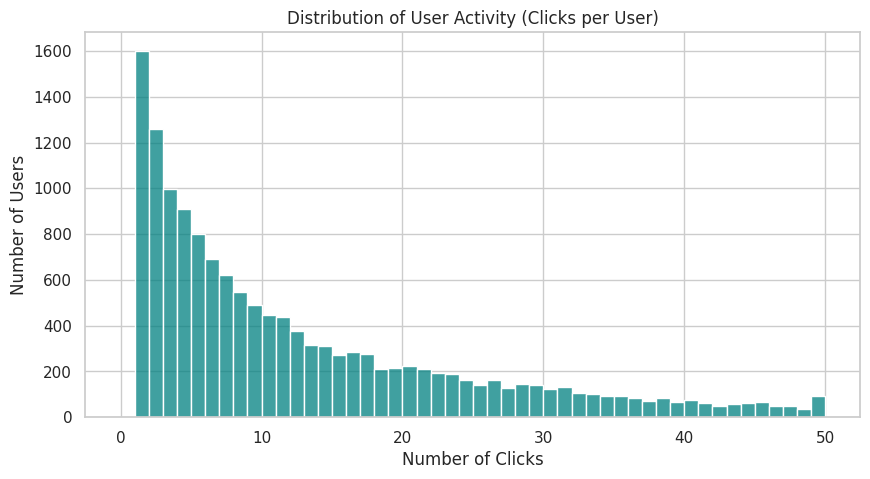

User Stats:
 - Median Clicks per User: 9
 - Max Clicks by one User: 155
 - % of Users with only 1 Click: 10.6%


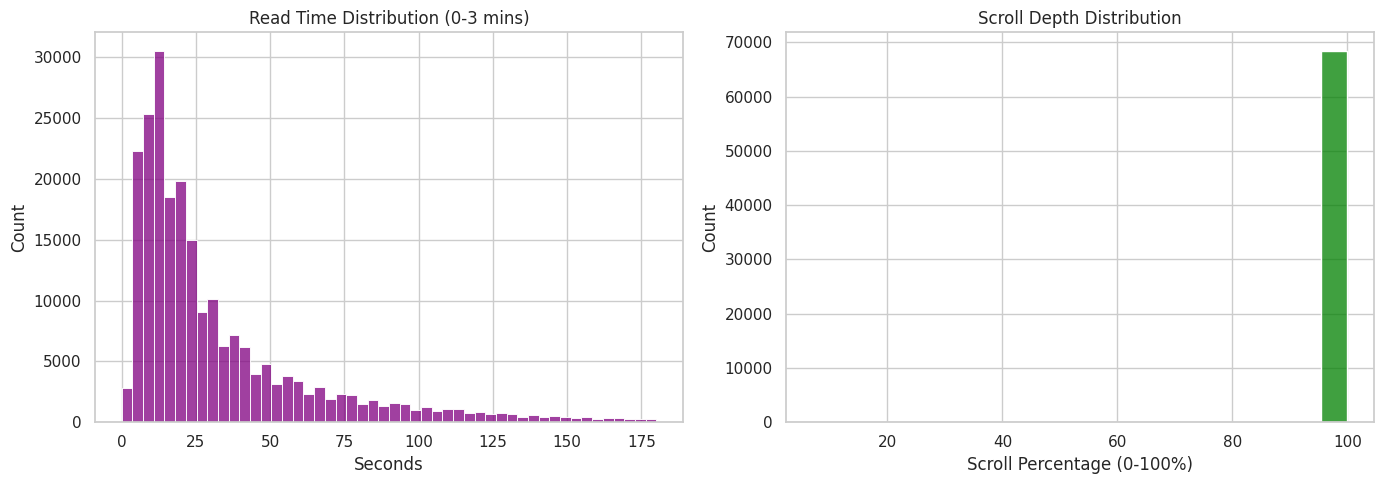


Competition/Choice Analysis:
 - On average, a user sees 11.1 articles but clicks only 1.
 - Implied CTR (1 click / avg options): 9.01%


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_user_engagement(df):
    print("--- (E) User Engagement & Depth Analysis ---")

    # ---------------------------------------------------------
    # 1. USER ACTIVITY (Clicks per User)
    # ---------------------------------------------------------
    # How many articles does a single user typically read?
    user_counts = df['user_id'].value_counts()

    plt.figure(figsize=(10, 5))
    # We clip at 50 to make the histogram readable (some power users might have 1000+)
    sns.histplot(user_counts, bins=50, kde=False, color='teal', binrange=(0, 50))
    plt.title('Distribution of User Activity (Clicks per User)')
    plt.xlabel('Number of Clicks')
    plt.ylabel('Number of Users')
    plt.show()

    print(f"User Stats:")
    print(f" - Median Clicks per User: {user_counts.median():.0f}")
    print(f" - Max Clicks by one User: {user_counts.max()}")
    print(f" - % of Users with only 1 Click: {(user_counts == 1).mean():.1%}")

    # ---------------------------------------------------------
    # 2. ENGAGEMENT DEPTH (Read Time & Scroll)
    # ---------------------------------------------------------
    # Are users actually reading?
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot A: Read Time (Zoomed to 3 minutes max for visibility)
    sns.histplot(df['read_time_seconds'], bins=50, color='purple', binrange=(0, 180), ax=axes[0])
    axes[0].set_title('Read Time Distribution (0-3 mins)')
    axes[0].set_xlabel('Seconds')

    # Plot B: Scroll Percentage
    if 'scroll_percentage' in df.columns and df['scroll_percentage'].notna().sum() > 0:
        sns.histplot(df['scroll_percentage'], bins=20, color='green', kde=False, ax=axes[1])
        axes[1].set_title('Scroll Depth Distribution')
        axes[1].set_xlabel('Scroll Percentage (0-100%)')
    else:
        axes[1].text(0.5, 0.5, 'Scroll Data Missing', ha='center')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # 3. CLICK-THROUGH RATE (CTR) PROXY
    # ---------------------------------------------------------
    # We estimate how "choosy" users are.
    # Note: article_ids_inview is a list of strings/ints. We measure its length.

    if 'article_ids_inview' in df.columns:
        # Calculate length of inview list (number of options shown)
        df['inview_count'] = df['article_ids_inview'].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else 0)

        # Avoid division by zero
        avg_options = df[df['inview_count'] > 0]['inview_count'].mean()
        print(f"\nCompetition/Choice Analysis:")
        print(f" - On average, a user sees {avg_options:.1f} articles but clicks only 1.")
        print(f" - Implied CTR (1 click / avg options): {1/avg_options:.2%}")

# Run the function using the cleaned dataframe from previous steps
# If df_clean doesn't exist in memory, use df_behaviors
if 'df_clean' in locals():
    analyze_user_engagement(df_clean)
else:
    analyze_user_engagement(df_behaviors)

## (E) Initial Insights and Direction

### 1. Data Observations
* **Popularity Bias:** We observed a Gini Coefficient of **0.69**, confirming a strong "Long Tail" distribution where a small percentage of articles drive the majority of traffic.
* **User Behavior:** The median user clicks **9 articles**, providing a rich history for sequential recommendation. However, **10.6%** of users have only 1 click, representing a "Cold Start" challenge.
* **Engagement Patterns:**
    * **Snacking vs. Reading:** Most read times cluster around **10-20 seconds**, suggesting users scan headlines rather than reading deep content.
    * **Scroll Depth:** There is a significant spike at **100% scroll**, implying users often scroll to the bottom.

### 2. Hypotheses & Research Questions
Based on these observations, we propose the following direction:

* **Hypothesis 1 (Cold Start):** Since ~10% of users have limited history, relying solely on ID-based Collaborative Filtering will fail for them.
    * *RQ:* Can hybridizing content features (Title Embeddings) with user history improve accuracy for users with <3 clicks?
* **Hypothesis 2 (Noise Filtering):** The significant number of "bounces" (<5s read time) introduces noise.
    * *RQ:* Does training only on "deep engagement" clicks (read_time > 10s) improve the Next-Item Prediction accuracy (NDCG) compared to training on all clicks?

## (F) GitHub Portfolio
* **Project Repository:** [INSERT YOUR GITHUB LINK HERE]
* **Status:** Public
* **Contents:**
    * `Checkpoint1_EDA.ipynb` (This notebook)
    * `README.md` (Project overview and findings)